<a href="https://colab.research.google.com/github/manish2393cool/ML-Python/blob/master/2_Forecasting_and_Predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Quandl

In [0]:
import pandas as pd
import quandl as q
import numpy as np

In [0]:
import math

In [0]:
q.ApiConfig.api_key = 'HyXNvMhpxYjiXjSuWZtu'
df = q.get('WIKI/GOOGL')

In [0]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] *100.0
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] *100.0

df = df[['Adj. Close', 'HL_PCT','PCT_Change', 'Adj. Volume']]

In [6]:
df.head(10)

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0
2004-08-26,54.122070,0.037068,2.820391,7094800.0
2004-08-27,53.239345,2.326896,-1.803885,6211700.0
2004-08-30,51.162935,3.411430,-3.106003,5196700.0
2004-08-31,51.343492,1.308977,0.048866,4917800.0


In [0]:
# can change depending on the forecast column you want
forecast_col = 'Adj. Close'
# adjust outlier
df.fillna(-99999, inplace = True)

In [0]:
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics.scorer import make_scorer
# train test split
from sklearn.model_selection import train_test_split

# cross_validation to handle bias and spread the data points
from sklearn.linear_model import LinearRegression

#now find x and y

Forecast for next 1%

In [9]:
# want to forecast 1% in future
forecast_out = int(math.ceil(0.05*len(df)))
# attributes which effect next days
df['label'] = df[forecast_col].shift(-forecast_out)
print("Days in advance: ", forecast_out)

Days in advance:  172


In [0]:
x = np.array(df.drop(['label'],1))
x = preprocessing.scale(x)
x = x[:-forecast_out]
x_lately = x[-forecast_out:]

df.dropna(inplace=True)

# scaling is together also scale new values but adds processing time
# can be skipped if high speed trading is going on
y = np.array(df['label'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [11]:
clf = LinearRegression()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)*100
print(accuracy)

92.73420456469105


In [12]:
# sincefor x_lately we have not predicted anything
forecast_set = clf.predict(x_lately)
print( forecast_set)
print("Accuracy:",accuracy)
print("for next how many days prediction is done: ",forecast_out)

[ 875.01659742  864.97941935  845.04051819  870.10849671  874.60965315
  881.88901161  870.9436949   880.47698867  880.7974356   873.86964745
  875.06643514  882.94521448  885.85324227  870.59038121  857.3624087
  858.12051583  873.29707176  870.96542481  888.0026578   891.87992775
  907.85188608  906.01195613  914.79656092  917.31597914  914.67433497
  907.72431927  911.25982159  913.83921151  910.31642565  907.66851865
  905.84643201  908.62860933  902.16975113  900.33004985  888.68866166
  906.3838833   905.76458114  911.62364392  925.69679516  927.25139221
  925.88664137  930.04334427  929.60720178  931.44407528  927.22951949
  928.97550785  924.47112094  927.9776918   946.75816171  951.94335212
  961.82678457  959.59547485  947.53621773  923.11949262  919.27210306
  913.71380599  917.84996988  919.44222906  920.78635517  929.61089421
  930.30019846  930.15244092  935.72507397  940.32567052  941.32002737
  938.48244464  943.88029691  948.71531854  951.79093672  954.21684768
  953.4

In [0]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

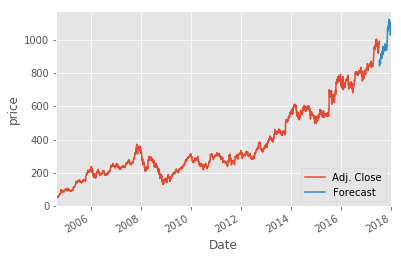

In [14]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

#now populate dataframe with the new dates and forecast values

for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]


# here date is taken as a index which can be checked using df.head()
# df.head()

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('price')
plt.show()

PLOTTING THE GRAPH

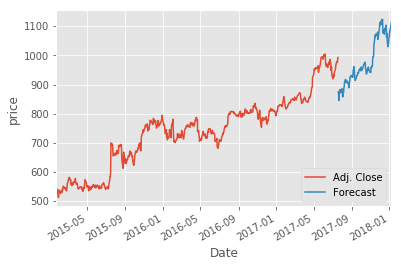

In [19]:
df['Adj. Close'].iloc[-800:df['Forecast'].shape[0]].plot()
df['Forecast'].iloc[-800:df['Forecast'].shape[0]].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('price')
plt.show()

As many jobs as you want

In [0]:
clf = LinearRegression(n_jobs=50)
clf.fit(x_train, y_train)
accuracy = round( clf.score(x_test, y_test)*100, 3 )
print(accuracy)

92.734
